In [3]:
import pandas as pd
result_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\ADNI\\ADNI-results\\ADNI_probability_abeta.csv")

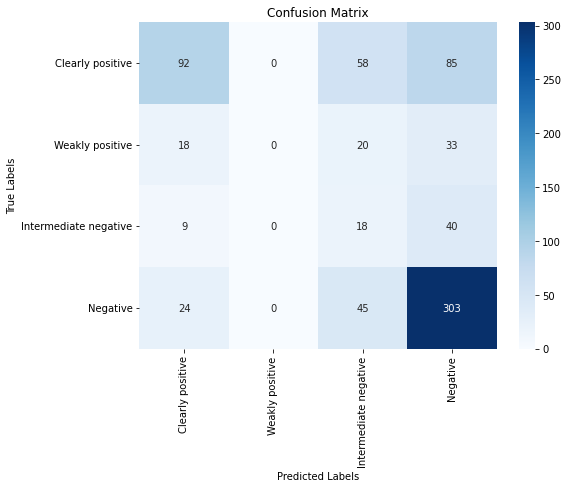

In [4]:
df=result_adni
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')

# Step 1: Rename the columns to remove the "Abeta-" prefix
df.rename(columns={
    'Abeta-Clearly positive': 'Clearly positive',
    'Abeta-Weakly positive': 'Weakly positive',
    'Abeta-Intermediate negative': 'Intermediate negative',
    'Abeta-Negative': 'Negative'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']].idxmax(axis=1)

# Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = df_filtered["Truth"]
y_pred = df_filtered["Prediction"]

# Define the class names
# Define the class names in the desired order, excluding 'Unknown'
desired_order = ['Clearly positive','Weakly positive','Intermediate negative','Negative']
# Filter out 'Unknown' class from both true and predicted labels
mask = (y_true != 'Unknown') & (y_pred != 'Unknown')
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Compute the confusion matrix
cm_complete = confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_complete , annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [5]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm_complete)):
    TP = cm_complete[i, i]
    FN = np.sum(cm_complete[i, :]) - TP
    FP = np.sum(cm_complete[:, i]) - TP
    TN = np.sum(cm_complete) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.5544
Weighted Specificity: 0.7406


In [8]:
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming MMSE is a pandas Series and filtered_df is a DataFrame

# Create a dictionary to store the AUC for each class
auc_scores = {}
cate= ["Clearly positive","Weakly positive","Intermediate negative","Negative"]
class_weights = []

# Iterate through each class in filtered_df columns
for i,cls in enumerate(cate):
    # Convert MMSE to binary: 1 if the class matches, 0 otherwise
    binary_true_labels = ( df_filtered["Truth"]== cls).astype(int)
    
    # Get the predicted probabilities for the current class
    pred_probs = df_filtered.iloc[:,i+1]
    
    # Calculate the AUC for the current class
    auc_number = roc_auc_score(binary_true_labels, pred_probs)
    class_weights.append(sum(df_filtered["Truth"] == cls))
    # Store the AUC in the dictionary
    auc_scores[cls] = auc_number

# Convert the dictionary to a DataFrame for easier viewing
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df)
weighted_auc = np.average(auc_df['AUC'], weights=class_weights)
print(weighted_auc)

                            AUC
Clearly positive       0.744047
Weakly positive        0.595854
Intermediate negative  0.504139
Negative               0.753121
0.7128788757300578


### HABS

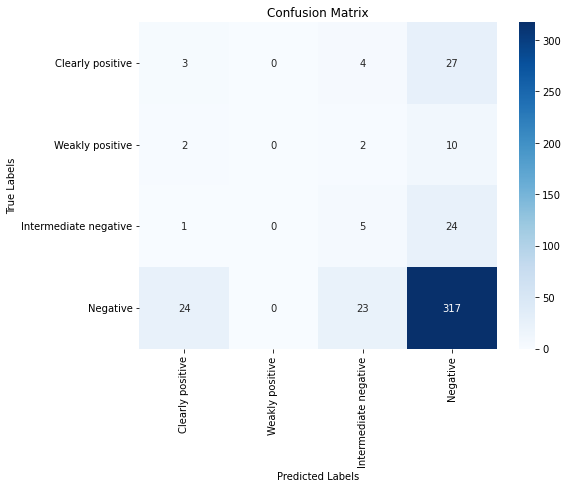

In [11]:
import pandas as pd
result_habs=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\HABS-HD\\HABS-HD-results\\HABS-HD_probability_abeta.csv")
df=result_habs
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')

# Step 1: Rename the columns to remove the "Abeta-" prefix
df.rename(columns={
    'Abeta-Clearly positive': 'Clearly positive',
    'Abeta-Weakly positive': 'Weakly positive',
    'Abeta-Intermediate negative': 'Intermediate negative',
    'Abeta-Negative': 'Negative'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']].idxmax(axis=1)

# Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = df_filtered["Truth"]
y_pred = df_filtered["Prediction"]

# Define the class names
# Define the class names in the desired order, excluding 'Unknown'
desired_order = ['Clearly positive','Weakly positive','Intermediate negative','Negative']
# Filter out 'Unknown' class from both true and predicted labels
mask = (y_true != 'Unknown') & (y_pred != 'Unknown')
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Compute the confusion matrix
cm_complete = confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_complete , annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [12]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm_complete)):
    TP = cm_complete[i, i]
    FN = np.sum(cm_complete[i, :]) - TP
    FP = np.sum(cm_complete[:, i]) - TP
    TN = np.sum(cm_complete) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.7353
Weighted Specificity: 0.3461


In [13]:
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming MMSE is a pandas Series and filtered_df is a DataFrame

# Create a dictionary to store the AUC for each class
auc_scores = {}
cate= ["Clearly positive","Weakly positive","Intermediate negative","Negative"]
class_weights = []

# Iterate through each class in filtered_df columns
for i,cls in enumerate(cate):
    # Convert MMSE to binary: 1 if the class matches, 0 otherwise
    binary_true_labels = ( df_filtered["Truth"]== cls).astype(int)
    
    # Get the predicted probabilities for the current class
    pred_probs = df_filtered.iloc[:,i+1]
    
    # Calculate the AUC for the current class
    auc_number = roc_auc_score(binary_true_labels, pred_probs)
    class_weights.append(sum(df_filtered["Truth"] == cls))
    # Store the AUC in the dictionary
    auc_scores[cls] = auc_number

# Convert the dictionary to a DataFrame for easier viewing
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df)
weighted_auc = np.average(auc_df['AUC'], weights=class_weights)
print(weighted_auc)

                            AUC
Clearly positive       0.686923
Weakly positive        0.661215
Intermediate negative  0.625202
Negative               0.658918
0.6588566138234753


## POINTER

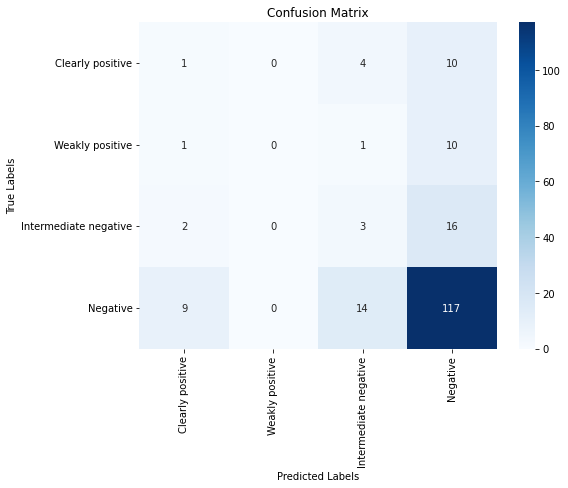

In [14]:
import pandas as pd
result_pointer=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\POINTER\\POINTER-results\\POINTER_probability_abeta.csv")
df=result_pointer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')

# Step 1: Rename the columns to remove the "Abeta-" prefix
df.rename(columns={
    'Abeta-Clearly positive': 'Clearly positive',
    'Abeta-Weakly positive': 'Weakly positive',
    'Abeta-Intermediate negative': 'Intermediate negative',
    'Abeta-Negative': 'Negative'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']].idxmax(axis=1)

# Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = df_filtered["Truth"]
y_pred = df_filtered["Prediction"]

# Define the class names
# Define the class names in the desired order, excluding 'Unknown'
desired_order = ['Clearly positive','Weakly positive','Intermediate negative','Negative']
# Filter out 'Unknown' class from both true and predicted labels
mask = (y_true != 'Unknown') & (y_pred != 'Unknown')
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Compute the confusion matrix
cm_complete = confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_complete , annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [15]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm_complete)):
    TP = cm_complete[i, i]
    FN = np.sum(cm_complete[i, :]) - TP
    FP = np.sum(cm_complete[:, i]) - TP
    TN = np.sum(cm_complete) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.6436
Weighted Specificity: 0.4232


In [16]:
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming MMSE is a pandas Series and filtered_df is a DataFrame

# Create a dictionary to store the AUC for each class
auc_scores = {}
cate= ["Clearly positive","Weakly positive","Intermediate negative","Negative"]
class_weights = []

# Iterate through each class in filtered_df columns
for i,cls in enumerate(cate):
    # Convert MMSE to binary: 1 if the class matches, 0 otherwise
    binary_true_labels = ( df_filtered["Truth"]== cls).astype(int)
    
    # Get the predicted probabilities for the current class
    pred_probs = df_filtered.iloc[:,i+1]
    
    # Calculate the AUC for the current class
    auc_number = roc_auc_score(binary_true_labels, pred_probs)
    class_weights.append(sum(df_filtered["Truth"] == cls))
    # Store the AUC in the dictionary
    auc_scores[cls] = auc_number

# Convert the dictionary to a DataFrame for easier viewing
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df)
weighted_auc = np.average(auc_df['AUC'], weights=class_weights)
print(weighted_auc)

                            AUC
Clearly positive       0.617341
Weakly positive        0.641098
Intermediate negative  0.570716
Negative               0.640625
0.630988443432117


## A4

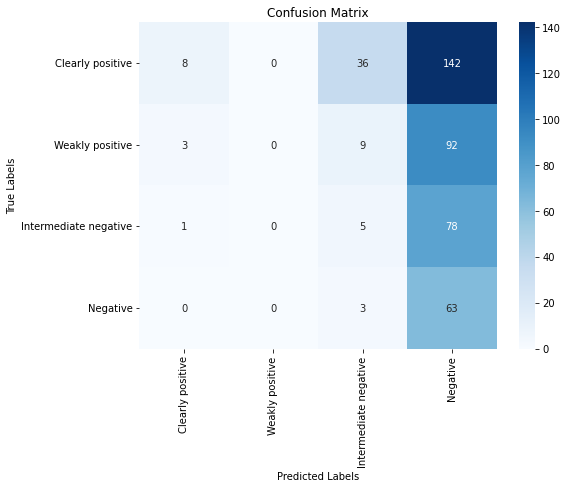

In [17]:
import pandas as pd
result_a4=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\A4\\A4-results\\A4_probability_abeta.csv")
df=result_a4
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')

# Step 1: Rename the columns to remove the "Abeta-" prefix
df.rename(columns={
    'Abeta-Clearly positive': 'Clearly positive',
    'Abeta-Weakly positive': 'Weakly positive',
    'Abeta-Intermediate negative': 'Intermediate negative',
    'Abeta-Negative': 'Negative'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']].idxmax(axis=1)

# Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = df_filtered["Truth"]
y_pred = df_filtered["Prediction"]

# Define the class names
# Define the class names in the desired order, excluding 'Unknown'
desired_order = ['Clearly positive','Weakly positive','Intermediate negative','Negative']
# Filter out 'Unknown' class from both true and predicted labels
mask = (y_true != 'Unknown') & (y_pred != 'Unknown')
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Compute the confusion matrix
cm_complete = confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_complete , annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [18]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm_complete)):
    TP = cm_complete[i, i]
    FN = np.sum(cm_complete[i, :]) - TP
    FP = np.sum(cm_complete[:, i]) - TP
    TN = np.sum(cm_complete) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.1727
Weighted Specificity: 0.8425


In [19]:
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming MMSE is a pandas Series and filtered_df is a DataFrame

# Create a dictionary to store the AUC for each class
auc_scores = {}
cate= ["Clearly positive","Weakly positive","Intermediate negative","Negative"]
class_weights = []

# Iterate through each class in filtered_df columns
for i,cls in enumerate(cate):
    # Convert MMSE to binary: 1 if the class matches, 0 otherwise
    binary_true_labels = ( df_filtered["Truth"]== cls).astype(int)
    
    # Get the predicted probabilities for the current class
    pred_probs = df_filtered.iloc[:,i+1]
    
    # Calculate the AUC for the current class
    auc_number = roc_auc_score(binary_true_labels, pred_probs)
    class_weights.append(sum(df_filtered["Truth"] == cls))
    # Store the AUC in the dictionary
    auc_scores[cls] = auc_number

# Convert the dictionary to a DataFrame for easier viewing
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df)
weighted_auc = np.average(auc_df['AUC'], weights=class_weights)
print(weighted_auc)

                            AUC
Clearly positive       0.707137
Weakly positive        0.471554
Intermediate negative  0.398642
Negative               0.696808
0.5910101945245427


## Binary 

In [21]:
result_a4=result_a4[result_a4["Truth"]!="Unknown."]
df=result_a4
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')

# Step 1: Rename the columns to remove the "Abeta-" prefix
df.rename(columns={
    'Abeta-Clearly positive': 'Clearly positive',
    'Abeta-Weakly positive': 'Weakly positive',
    'Abeta-Intermediate negative': 'Intermediate negative',
    'Abeta-Negative': 'Negative'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']].idxmax(axis=1)

# Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
df=df_filtered

df['Binary Truth'] = df['Truth'].apply(lambda x: 1 if x=='Intermediate negative' or x=='Clearly positive' or x=="Weakly positive" else 0)
df=df_filtered

df=df_filtered

df['Binary Truth'] = df['Truth'].apply(lambda x: 1 if x=='Intermediate negative' or x=='Clearly positive' or x=="Weakly positive" else 0)
# Redefining binary outcomes based on the sum of the probabilities for clearly positive and weakly positive
df['Positive Probability'] = df['Clearly positive'] + df['Weakly positive']+df['Intermediate negative'] 
df['Negative Probability'] = df['Negative']

# Recalculating binary truth and binary prediction based on higher probability
df['Binary Prediction'] = df.apply(lambda x: 1 if x['Positive Probability'] > x['Negative Probability'] else 0, axis=1)

# Recalculate accuracy, specificity, and AUC
accuracy = accuracy_score(df['Binary Truth'], df['Binary Prediction'])
tn, fp, fn, tp = confusion_matrix(df['Binary Truth'], df['Binary Prediction']).ravel()
specificity = tn / (tn + fp)
auc = roc_auc_score(df['Binary Truth'], df['Positive Probability'])
print(accuracy)
print(specificity)
print(auc)



0.5818181818181818
0.7727272727272727
0.6942148760330578


In [22]:
df=result_pointer
df.rename(columns={
    'Abeta-Clearly positive': 'Clearly positive',
    'Abeta-Weakly positive': 'Weakly positive',
    'Abeta-Intermediate negative': 'Intermediate negative',
    'Abeta-Negative': 'Negative'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']].idxmax(axis=1)

# Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df=df_filtered
df['Binary Truth'] = df['Truth'].apply(lambda x: 1 if x=='Intermediate negative' or x=='Clearly positive' or x=="Weakly positive" else 0)
# Redefining binary outcomes based on the sum of the probabilities for clearly positive and weakly positive
df['Positive Probability'] = df['Clearly positive'] + df['Weakly positive']+df['Intermediate negative']
df['Negative Probability'] = df['Negative']

# Recalculating binary truth and binary prediction based on higher probability
df['Binary Prediction'] = df.apply(lambda x: 1 if x['Positive Probability'] > x['Negative Probability'] else 0, axis=1)

# Recalculate accuracy, specificity, and AUC
accuracy = accuracy_score(df['Binary Truth'], df['Binary Prediction'])
tn, fp, fn, tp = confusion_matrix(df['Binary Truth'], df['Binary Prediction']).ravel()
specificity = tn / (tn + fp)
auc = roc_auc_score(df['Binary Truth'], df['Positive Probability'])
print(accuracy)
print(specificity)
print(auc)



0.648936170212766
0.7
0.640625


In [27]:
df=result_habs
df.rename(columns={
    'Abeta-Clearly positive': 'Clearly positive',
    'Abeta-Weakly positive': 'Weakly positive',
    'Abeta-Intermediate negative': 'Intermediate negative',
    'Abeta-Negative': 'Negative'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']].idxmax(axis=1)

# Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df=df_filtered
df['Binary Truth'] = df['Truth'].apply(lambda x: 1 if x=='Intermediate negative' or x=='Clearly positive' or x=="Weakly positive" else 0)
# Redefining binary outcomes based on the sum of the probabilities for clearly positive and weakly positive
df['Positive Probability'] = df['Clearly positive'] + df['Weakly positive']+df['Intermediate negative'] 
df['Negative Probability'] = df['Negative']

# Recalculating binary truth and binary prediction based on higher probability
df['Binary Prediction'] = df.apply(lambda x: 1 if x['Positive Probability'] > x['Negative Probability'] else 0, axis=1)

# Recalculate accuracy, specificity, and AUC
accuracy = accuracy_score(df['Binary Truth'], df['Binary Prediction'])
tn, fp, fn, tp = confusion_matrix(df['Binary Truth'], df['Binary Prediction']).ravel()
specificity = tn / (tn + fp)
auc = roc_auc_score(df['Binary Truth'], df['Positive Probability'])

print(accuracy)
print(specificity)
print(auc)


0.5701357466063348
0.5384615384615384
0.6616652578191039


C:\Users\25110\AppData\Local\Temp/ipykernel_19664/2496998253.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Binary Truth'] = df['Truth'].apply(lambda x: 1 if x=='Intermediate negative' or x=='Clearly positive' or x=="Weakly positive" else 0)
C:\Users\25110\AppData\Local\Temp/ipykernel_19664/2496998253.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positive Probability'] = df['Clearly positive'] + df['Weakly positive']+df['Intermediate negative']
C:\Users\25110\AppData\Local\Temp/ipykerne

In [26]:
df

,Index,Clearly positive,Weakly positive,Intermediate negative,Negative,Truth,Prediction,Binary Truth,Positive Probability,Negative Probability,Binary Prediction
0,0,0.056283,0.075737,0.299545,0.568436,Negative,Negative,0,0.431564,0.568436,0
1,1,0.048201,0.069045,0.304643,0.578110,Negative,Negative,0,0.421890,0.578110,0
2,2,0.357568,0.000000,0.000000,0.642432,Negative,Negative,0,0.357568,0.642432,0
3,3,0.077161,0.078376,0.356789,0.487673,Negative,Negative,0,0.512327,0.487673,1
4,4,0.023776,0.053579,0.259638,0.663008,Negative,Negative,0,0.336992,0.663008,0
...,...,...,...,...,...,...,...,...,...,...,...
731,731,0.173388,0.119168,0.304305,0.403139,Negative,Negative,0,0.596861,0.403139,1
733,733,0.081513,0.084100,0.302857,0.531530,Negative,Negative,0,0.468470,0.531530,0
736,736,0.109587,0.109587,0.312184,0.468643,Negative,Negative,0,0.531357,0.468643,1
738,738,0.196381,0.126793,0.304161,0.372665,Weakly positive,Negative,1,0.627335,0.372665,1


In [24]:
df=result_adni
df.rename(columns={
    'Abeta-Clearly positive': 'Clearly positive',
    'Abeta-Weakly positive': 'Weakly positive',
    'Abeta-Intermediate negative': 'Intermediate negative',
    'Abeta-Negative': 'Negative'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Clearly positive', 'Weakly positive', 'Intermediate negative', 'Negative']].idxmax(axis=1)

# Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df=df_filtered
df['Binary Truth'] = df['Truth'].apply(lambda x: 1 if x=='Intermediate negative' or x=='Clearly positive' or x=="Weakly positive" else 0)
# Redefining binary outcomes based on the sum of the probabilities for clearly positive and weakly positive
df['Positive Probability'] = df['Clearly positive'] + df['Weakly positive']+df['Intermediate negative']
df['Negative Probability'] =  df['Negative']

# Recalculating binary truth and binary prediction based on higher probability
df['Binary Prediction'] = df.apply(lambda x: 1 if x['Positive Probability'] > x['Negative Probability'] else 0, axis=1)

# Recalculate accuracy, specificity, and AUC
accuracy = accuracy_score(df['Binary Truth'], df['Binary Prediction'])
tn, fp, fn, tp = confusion_matrix(df['Binary Truth'], df['Binary Prediction']).ravel()
specificity = tn / (tn + fp)
auc = roc_auc_score(df['Binary Truth'], df['Positive Probability'])

print(accuracy)
print(specificity)
print(auc)


0.5825503355704698
0.25806451612903225
0.753120585776471


C:\Users\25110\AppData\Local\Temp/ipykernel_19664/1267208054.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Binary Truth'] = df['Truth'].apply(lambda x: 1 if x=='Intermediate negative' or x=='Clearly positive' or x=="Weakly positive" else 0)
C:\Users\25110\AppData\Local\Temp/ipykernel_19664/1267208054.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Positive Probability'] = df['Clearly positive'] + df['Weakly positive']+df['Intermediate negative']
C:\Users\25110\AppData\Local\Temp/ipykerne

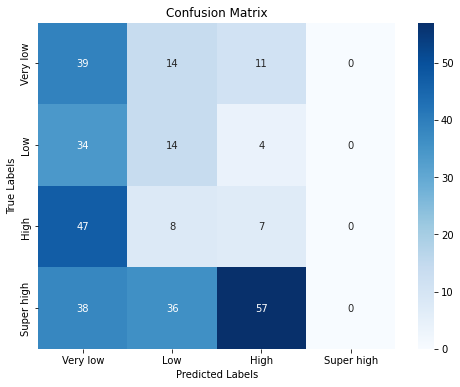

In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
result_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\ADNI\\ADNI-results\\ADNI_probability_meta_tau.csv")


# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df=result_adni
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing

df.rename(columns={
    'Meta Tau-Low': 'Low',
    'Meta Tau-Very low': 'Very low',
    'Meta Tau-Super high': 'Super high',
    'Meta Tau-High':'High'
}, inplace=True)

# # Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Very low', 'Low',  'High','Super high']].idxmax(axis=1)

# # Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = df_filtered["Truth"]
y_pred = df_filtered["Prediction"]

# Define the class names
# Define the class names in the desired order, excluding 'Unknown'
desired_order = ['Very low', 'Low',  'High','Super high']
# Filter out 'Unknown' class from both true and predicted labels
mask = (y_true != 'Unknown.') & (y_pred != 'Unknown.')
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Compute the confusion matrix
cm= confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming MMSE is a pandas Series and filtered_df is a DataFrame

# Create a dictionary to store the AUC for each class
auc_scores = {}
cate=["Low","Very low","Super high","High"]
class_weights = []

# Iterate through each class in filtered_df columns
for i,cls in enumerate(cate):
    # Convert MMSE to binary: 1 if the class matches, 0 otherwise
    binary_true_labels = ( df_filtered["Truth"]== cls).astype(int)
#     if i==0 or i==2 or i==3:
#         continue
    # Get the predicted probabilities for the current class
    pred_probs = df_filtered.iloc[:,i+1]
    
    # Calculate the AUC for the current class
    auc_number = roc_auc_score(binary_true_labels, pred_probs)
    class_weights.append(sum(df_filtered["Truth"] == cls))
    # Store the AUC in the dictionary
    auc_scores[cls] = auc_number

# Convert the dictionary to a DataFrame for easier viewing
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df)
weighted_auc = np.average(auc_df['AUC'], weights=class_weights)
print(weighted_auc)

Weighted Sensitivity: 0.1942
Weighted Specificity: 0.8029
                 AUC
Low         0.572359
Very low    0.577041
Super high  0.616305
High        0.366397
0.5506336971060131


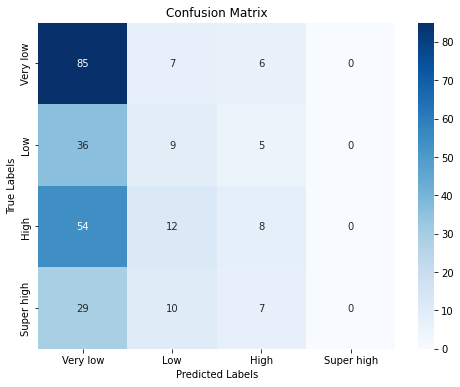

Weighted Sensitivity: 0.3806
Weighted Specificity: 0.6936
                 AUC
Low         0.446055
Very low    0.545078
Super high  0.593126
High        0.527793
0.5300779259966908


In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
result_habs=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\HABS-HD\\HABS-HD-results\\HABS-HD_probability_meta_tau.csv")


# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df=result_habs
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing

df.rename(columns={
    'Meta Tau-Low': 'Low',
    'Meta Tau-Very low': 'Very low',
    'Meta Tau-Super high': 'Super high',
    'Meta Tau-High':'High'
}, inplace=True)

# # Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Very low', 'Low',  'High','Super high']].idxmax(axis=1)

# # Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = df_filtered["Truth"]
y_pred = df_filtered["Prediction"]

# Define the class names
# Define the class names in the desired order, excluding 'Unknown'
desired_order = ['Very low', 'Low',  'High','Super high']
# Filter out 'Unknown' class from both true and predicted labels
mask = (y_true != 'Unknown.') & (y_pred != 'Unknown.')
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Compute the confusion matrix
cm= confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming MMSE is a pandas Series and filtered_df is a DataFrame

# Create a dictionary to store the AUC for each class
auc_scores = {}
cate=["Low","Very low","Super high","High"]
class_weights = []

# Iterate through each class in filtered_df columns
for i,cls in enumerate(cate):
    # Convert MMSE to binary: 1 if the class matches, 0 otherwise
    binary_true_labels = ( df_filtered["Truth"]== cls).astype(int)
#     if i==0 or i==2 or i==3:
#         continue
    # Get the predicted probabilities for the current class
    pred_probs = df_filtered.iloc[:,i+1]
    
    # Calculate the AUC for the current class
    auc_number = roc_auc_score(binary_true_labels, pred_probs)
    class_weights.append(sum(df_filtered["Truth"] == cls))
    # Store the AUC in the dictionary
    auc_scores[cls] = auc_number

# Convert the dictionary to a DataFrame for easier viewing
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df)
weighted_auc = np.average(auc_df['AUC'], weights=class_weights)
print(weighted_auc)


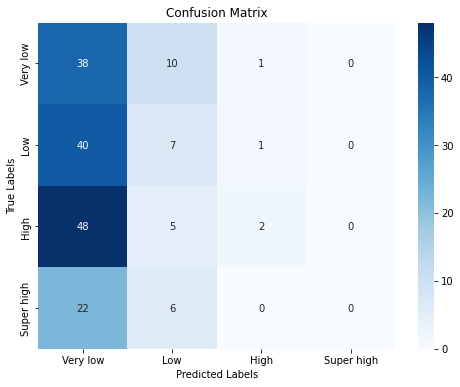

Weighted Sensitivity: 0.2611
Weighted Specificity: 0.7241
                 AUC
Low         0.467645
Very low    0.469855
Super high  0.452068
High        0.400436
0.4452875844287254


In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
result_pointer=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\POINTER\\POINTER-results\\POINTER_probability_meta_tau.csv")


# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df=result_pointer
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing

df.rename(columns={
    'Meta Tau-Low': 'Low',
    'Meta Tau-Very low': 'Very low',
    'Meta Tau-Super high': 'Super high',
    'Meta Tau-High':'High'
}, inplace=True)

# # Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Very low', 'Low',  'High','Super high']].idxmax(axis=1)

# # Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = df_filtered["Truth"]
y_pred = df_filtered["Prediction"]

# Define the class names
# Define the class names in the desired order, excluding 'Unknown'
desired_order = ['Very low', 'Low',  'High','Super high']
# Filter out 'Unknown' class from both true and predicted labels
mask = (y_true != 'Unknown.') & (y_pred != 'Unknown.')
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Compute the confusion matrix
cm= confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming MMSE is a pandas Series and filtered_df is a DataFrame

# Create a dictionary to store the AUC for each class
auc_scores = {}
cate=["Low","Very low","Super high","High"]
class_weights = []

# Iterate through each class in filtered_df columns
for i,cls in enumerate(cate):
    # Convert MMSE to binary: 1 if the class matches, 0 otherwise
    binary_true_labels = ( df_filtered["Truth"]== cls).astype(int)
#     if i==0 or i==2 or i==3:
#         continue
    # Get the predicted probabilities for the current class
    pred_probs = df_filtered.iloc[:,i+1]
    
    # Calculate the AUC for the current class
    auc_number = roc_auc_score(binary_true_labels, pred_probs)
    class_weights.append(sum(df_filtered["Truth"] == cls))
    # Store the AUC in the dictionary
    auc_scores[cls] = auc_number

# Convert the dictionary to a DataFrame for easier viewing
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df)
weighted_auc = np.average(auc_df['AUC'], weights=class_weights)
print(weighted_auc)


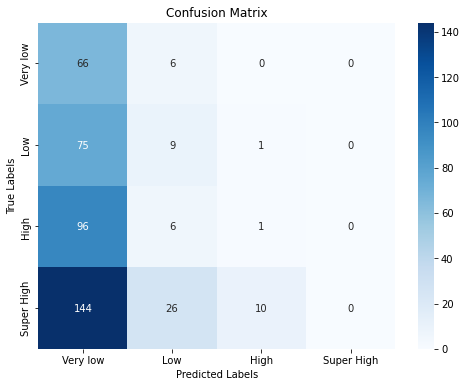

Weighted Sensitivity: 0.1727
Weighted Specificity: 0.8316
                 AUC
Low         0.480762
Very low    0.589221
Super High  0.526816
High        0.427559
0.5048959102737534


In [37]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
result_a4=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\A4\\A4-results\\A4_probability_meta_tau.csv")


# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df=result_a4
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing

df.rename(columns={
    'Meta Tau-Low': 'Low',
    'Meta Tau-Very low': 'Very low',
    'Meta Tau-Super high': 'Super high',
    'Meta Tau-High':'High'
}, inplace=True)

# # Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Very low', 'Low',  'High','Super high']].idxmax(axis=1)

# # Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = df_filtered["Truth"]
y_pred = df_filtered["Prediction"]

# Define the class names
# Define the class names in the desired order, excluding 'Unknown'
desired_order = ['Very low', 'Low',  'High','Super High']
# Filter out 'Unknown' class from both true and predicted labels
mask = (y_true != 'Unknown.') & (y_pred != 'Unknown.')
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Compute the confusion matrix
cm= confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming MMSE is a pandas Series and filtered_df is a DataFrame

# Create a dictionary to store the AUC for each class
auc_scores = {}
cate=["Low","Very low","Super High","High"]
class_weights = []

# Iterate through each class in filtered_df columns
for i,cls in enumerate(cate):
    # Convert MMSE to binary: 1 if the class matches, 0 otherwise
    binary_true_labels = ( df_filtered["Truth"]== cls).astype(int)
#     if i==0 or i==2 or i==3:
#         continue
    # Get the predicted probabilities for the current class
    pred_probs = df_filtered.iloc[:,i+1]
    
    # Calculate the AUC for the current class
    auc_number = roc_auc_score(binary_true_labels, pred_probs)
    class_weights.append(sum(df_filtered["Truth"] == cls))
    # Store the AUC in the dictionary
    auc_scores[cls] = auc_number

# Convert the dictionary to a DataFrame for easier viewing
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df)
weighted_auc = np.average(auc_df['AUC'], weights=class_weights)
print(weighted_auc)


## MMSE

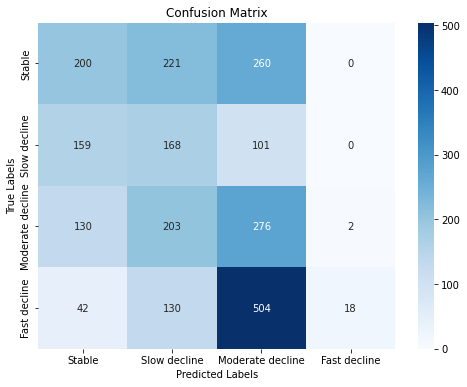

Weighted Sensitivity: 0.2742
Weighted Specificity: 0.7749
                       AUC
Slow decline      0.547891
Moderate decline  0.486679
Fast decline      0.727259
Stable            0.573479
0.5911827937857064


In [38]:
result_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\ADNI\\ADNI-results\\ADNI_probability_MMSE.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df=result_adni
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing
#MMSE-Slow	MMSE-Moderate	MMSE-Fast	MMSE-Not decreasing

df.rename(columns={
    'MMSE-Slow': 'Slow decline',
    'MMSE-Moderate': 'Moderate decline',
    'MMSE-Fast': 'Fast decline',
    'MMSE-Not decreasing':'Stable'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Slow decline', 'Moderate decline', 'Fast decline', 'Stable']].idxmax(axis=1)

# Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = df_filtered["Truth"]
y_pred = df_filtered["Prediction"]

# Define the class names
# Define the class names in the desired order, excluding 'Unknown'
desired_order = [ 'Stable','Slow decline', 'Moderate decline', 'Fast decline']
# Filter out 'Unknown' class from both true and predicted labels
mask = (y_true != 'Unknown.') & (y_pred != 'Unknown.')
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Compute the confusion matrix
cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming MMSE is a pandas Series and filtered_df is a DataFrame

# Create a dictionary to store the AUC for each class
auc_scores = {}
cate=['Slow decline', 'Moderate decline', 'Fast decline', 'Stable']
class_weights = []


# Iterate through each class in filtered_df columns
for i,cls in enumerate(cate):
    # Convert MMSE to binary: 1 if the class matches, 0 otherwise
    binary_true_labels = ( df_filtered["Truth"]== cls).astype(int)
    
    # Get the predicted probabilities for the current class
    pred_probs = df_filtered.iloc[:,i+1]
    # Calculate the AUC for the current class
    auc_number = roc_auc_score(binary_true_labels, pred_probs)
    class_weights.append(sum(df_filtered["Truth"] == cls))
    # Store the AUC in the dictionary
    auc_scores[cls] = auc_number

# Convert the dictionary to a DataFrame for easier viewing
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df)

weighted_auc = np.average(auc_df['AUC'], weights=class_weights)
print(weighted_auc)

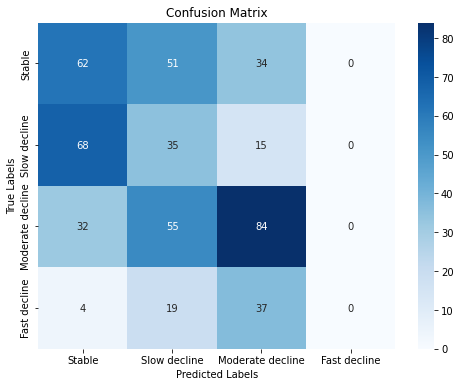

Weighted Sensitivity: 0.3649
Weighted Specificity: 0.7418
                       AUC
Slow decline      0.420870
Moderate decline  0.595079
Fast decline      0.779148
Stable            0.595014
0.5758811731305864


In [39]:
result_habs=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\HABS-HD\\HABS-HD-results\\HABS-HD_probability_MMSE.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df=result_habs
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing
#MMSE-Slow	MMSE-Moderate	MMSE-Fast	MMSE-Not decreasing

df.rename(columns={
    'MMSE-Slow': 'Slow decline',
    'MMSE-Moderate': 'Moderate decline',
    'MMSE-Fast': 'Fast decline',
    'MMSE-Not decreasing':'Stable'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['Slow decline', 'Moderate decline', 'Fast decline', 'Stable']].idxmax(axis=1)

# Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = df_filtered["Truth"]
y_pred = df_filtered["Prediction"]

# Define the class names
# Define the class names in the desired order, excluding 'Unknown'
desired_order = [ 'Stable','Slow decline', 'Moderate decline', 'Fast decline']
# Filter out 'Unknown' class from both true and predicted labels
mask = (y_true != 'Unknown.') & (y_pred != 'Unknown.')
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Compute the confusion matrix
cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming MMSE is a pandas Series and filtered_df is a DataFrame

# Create a dictionary to store the AUC for each class
auc_scores = {}
cate=['Slow decline', 'Moderate decline', 'Fast decline', 'Stable']
class_weights = []


# Iterate through each class in filtered_df columns
for i,cls in enumerate(cate):
    # Convert MMSE to binary: 1 if the class matches, 0 otherwise
    binary_true_labels = ( df_filtered["Truth"]== cls).astype(int)
    
    # Get the predicted probabilities for the current class
    pred_probs = df_filtered.iloc[:,i+1]
    # Calculate the AUC for the current class
    auc_number = roc_auc_score(binary_true_labels, pred_probs)
    class_weights.append(sum(df_filtered["Truth"] == cls))
    # Store the AUC in the dictionary
    auc_scores[cls] = auc_number

# Convert the dictionary to a DataFrame for easier viewing
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df)

weighted_auc = np.average(auc_df['AUC'], weights=class_weights)
print(weighted_auc)

## Binary

In [40]:

import pandas as pd
adni_mmse=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\ADNI\\ADNI-results\\ADNI_probability_MMSE.csv")
df=adni_mmse
df['Binary Truth'] = df['Truth'].apply(lambda x: 1 if 'stable' in x.lower() else 0)
# Redefining binary outcomes based on the sum of the probabilities for clearly positive and weakly positive
df['Not decreasing Probability'] = df['MMSE-Not decreasing'] 
df['Decreasing Probability'] = 1-df['MMSE-Not decreasing'] 

# Recalculating binary truth and binary prediction based on higher probability
df['Binary Prediction'] = df.apply(lambda x: 1 if x['Not decreasing Probability'] >= x['Decreasing Probability'] else 0, axis=1)

# Recalculate accuracy, specificity, and AUC
accuracy = accuracy_score(df['Binary Truth'], df['Binary Prediction'])
tn, fp, fn, tp = confusion_matrix(df['Binary Truth'], df['Binary Prediction']).ravel()
specificity = tn / (tn + fp)
auc = roc_auc_score(df['Binary Truth'], df['Not decreasing Probability'])

print(accuracy)

print(specificity)
print(auc)

0.705762987012987
0.9467190128996074
0.5760399860651627


In [42]:

import pandas as pd
habs_mmse=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\HABS-HD\\HABS-HD-results\\HABS-HD_probability_MMSE.csv")
df=habs_mmse
df['Binary Truth'] = df['Truth'].apply(lambda x: 1 if 'stable' in x.lower() else 0)
# Redefining binary outcomes based on the sum of the probabilities for clearly positive and weakly positive
df['Not decreasing Probability'] = df['MMSE-Not decreasing'] 
df['Decreasing Probability'] = 1-df['MMSE-Not decreasing'] 

# Recalculating binary truth and binary prediction based on higher probability
df['Binary Prediction'] = df.apply(lambda x: 1 if x['Not decreasing Probability'] >= x['Decreasing Probability'] else 0, axis=1)

# Recalculate accuracy, specificity, and AUC
accuracy = accuracy_score(df['Binary Truth'], df['Binary Prediction'])
tn, fp, fn, tp = confusion_matrix(df['Binary Truth'], df['Binary Prediction']).ravel()
specificity = tn / (tn + fp)
auc = roc_auc_score(df['Binary Truth'], df['Not decreasing Probability'])

print(accuracy)

print(specificity)
print(auc)

0.7223719676549866
0.8504201680672269
0.6696850168638885


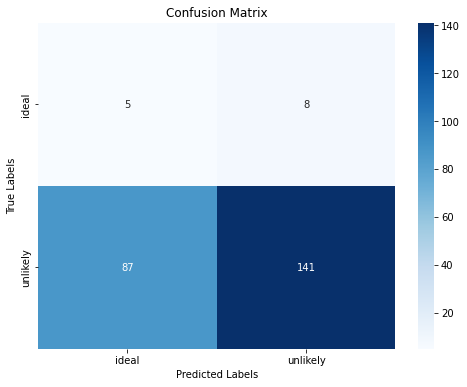

Weighted Sensitivity: 0.6058
Weighted Specificity: 0.3972
               AUC
ideal     0.510459
unlikely  0.510459
0.5104588394062077


In [43]:
import pandas as pd
result_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\ADNI\\ADNI-results\\ADNI_probability_treatment.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df=result_adni
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing
#MMSE-Slow	MMSE-Moderate	MMSE-Fast	MMSE-Not decreasing

df.rename(columns={
    'Treatment-Ideal': 'ideal',
    'Treatment-Unlikely': 'unlikely'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['ideal', 'unlikely']].idxmax(axis=1)

# Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = df_filtered["Truth"]
y_pred = df_filtered["Prediction"]

# Define the class names
# Define the class names in the desired order, excluding 'Unknown'
desired_order = [ 'ideal','unlikely']
# Filter out 'Unknown' class from both true and predicted labels
mask = (y_true != 'Unknown.') & (y_pred != 'Unknown.')
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Compute the confusion matrix
cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming MMSE is a pandas Series and filtered_df is a DataFrame

# Create a dictionary to store the AUC for each class
auc_scores = {}
cate=['ideal', 'unlikely']
class_weights = []


# Iterate through each class in filtered_df columns
for i,cls in enumerate(cate):
    # Convert MMSE to binary: 1 if the class matches, 0 otherwise
    binary_true_labels = ( df_filtered["Truth"]== cls).astype(int)
    
    # Get the predicted probabilities for the current class
    pred_probs = df_filtered.iloc[:,i+1]
    # Calculate the AUC for the current class
    auc_number = roc_auc_score(binary_true_labels, pred_probs)
    class_weights.append(sum(df_filtered["Truth"] == cls))
    # Store the AUC in the dictionary
    auc_scores[cls] = auc_number

# Convert the dictionary to a DataFrame for easier viewing
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df)
weighted_auc = np.average(auc_df['AUC'], weights=class_weights)
print(weighted_auc)



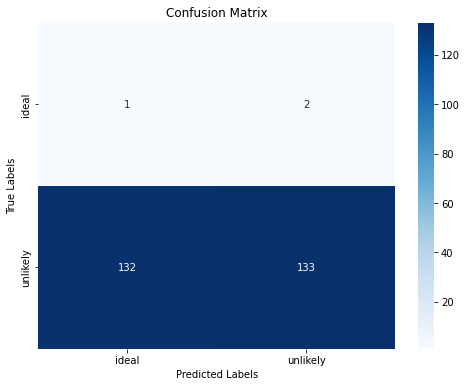

Weighted Sensitivity: 0.5000
Weighted Specificity: 0.3352
               AUC
ideal     0.586164
unlikely  0.529560
0.5301933727588474


In [44]:
import pandas as pd
result_habs=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\HABS-HD\\HABS-HD-results\\HABS-HD_probability_treatment.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df=result_habs
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing
#MMSE-Slow	MMSE-Moderate	MMSE-Fast	MMSE-Not decreasing

df.rename(columns={
    'Treatment-Ideal': 'ideal',
    'Treatment-Unlikely': 'unlikely'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['ideal', 'unlikely']].idxmax(axis=1)

# Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = df_filtered["Truth"]
y_pred = df_filtered["Prediction"]

# Define the class names
# Define the class names in the desired order, excluding 'Unknown'
desired_order = [ 'ideal','unlikely']
# Filter out 'Unknown' class from both true and predicted labels
mask = (y_true != 'Unknown.') & (y_pred != 'Unknown.')
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Compute the confusion matrix
cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming MMSE is a pandas Series and filtered_df is a DataFrame

# Create a dictionary to store the AUC for each class
auc_scores = {}
cate=['ideal', 'unlikely']
class_weights = []


# Iterate through each class in filtered_df columns
for i,cls in enumerate(cate):
    # Convert MMSE to binary: 1 if the class matches, 0 otherwise
    binary_true_labels = ( df_filtered["Truth"]== cls).astype(int)
    
    # Get the predicted probabilities for the current class
    pred_probs = df_filtered.iloc[:,i+1]
    # Calculate the AUC for the current class
    auc_number = roc_auc_score(binary_true_labels, pred_probs)
    class_weights.append(sum(df_filtered["Truth"] == cls))
    # Store the AUC in the dictionary
    auc_scores[cls] = auc_number

# Convert the dictionary to a DataFrame for easier viewing
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df)
weighted_auc = np.average(auc_df['AUC'], weights=class_weights)
print(weighted_auc)



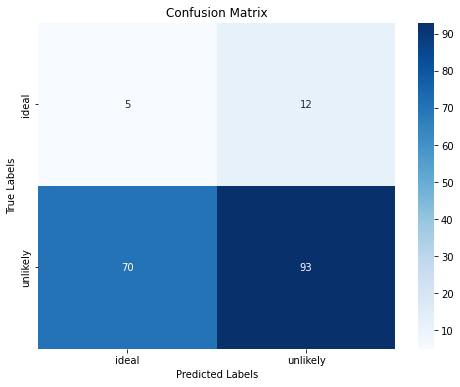

Weighted Sensitivity: 0.5444
Weighted Specificity: 0.3202
               AUC
ideal     0.450740
unlikely  0.448214
0.44845222342515745


In [45]:
import pandas as pd
result_pointer=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\POINTER\\POINTER-results\\POINTER_probability_treatment.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df=result_pointer
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing
#MMSE-Slow	MMSE-Moderate	MMSE-Fast	MMSE-Not decreasing

df.rename(columns={
    'Treatment-Ideal': 'ideal',
    'Treatment-Unlikely': 'unlikely'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['ideal', 'unlikely']].idxmax(axis=1)

# Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = df_filtered["Truth"]
y_pred = df_filtered["Prediction"]

# Define the class names
# Define the class names in the desired order, excluding 'Unknown'
desired_order = [ 'ideal','unlikely']
# Filter out 'Unknown' class from both true and predicted labels
mask = (y_true != 'Unknown.') & (y_pred != 'Unknown.')
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Compute the confusion matrix
cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming MMSE is a pandas Series and filtered_df is a DataFrame

# Create a dictionary to store the AUC for each class
auc_scores = {}
cate=['ideal', 'unlikely']
class_weights = []


# Iterate through each class in filtered_df columns
for i,cls in enumerate(cate):
    # Convert MMSE to binary: 1 if the class matches, 0 otherwise
    binary_true_labels = ( df_filtered["Truth"]== cls).astype(int)
    
    # Get the predicted probabilities for the current class
    pred_probs = df_filtered.iloc[:,i+1]
    # Calculate the AUC for the current class
    auc_number = roc_auc_score(binary_true_labels, pred_probs)
    class_weights.append(sum(df_filtered["Truth"] == cls))
    # Store the AUC in the dictionary
    auc_scores[cls] = auc_number

# Convert the dictionary to a DataFrame for easier viewing
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df)
weighted_auc = np.average(auc_df['AUC'], weights=class_weights)
print(weighted_auc)



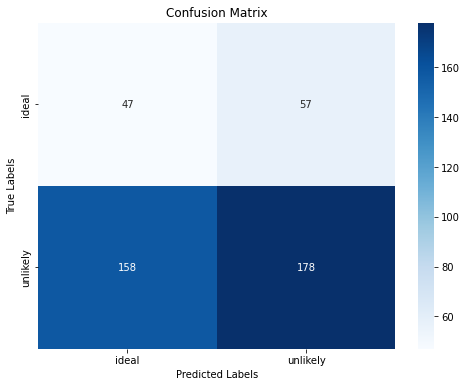

Weighted Sensitivity: 0.5114
Weighted Specificity: 0.4703
               AUC
ideal     0.501645
unlikely  0.501645
0.5016454899267399


In [46]:
import pandas as pd
result_A4=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\Zero-shot\\A4\\A4-results\\A4_probability_treatment.csv")
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Assuming you have loaded your dataset in df
# df = pd.read_csv('your_dataset.csv')
df=result_A4
# Step 1: Rename the columns to remove the "Abeta-" prefixAbeta-Slow	Abeta-Moderate	Abeta-Fast	Abeta-Not decreasing
#MMSE-Slow	MMSE-Moderate	MMSE-Fast	MMSE-Not decreasing

df.rename(columns={
    'Treatment-Ideal': 'ideal',
    'Treatment-Unlikely': 'unlikely'
}, inplace=True)

# Step 2: Generate 'Prediction' column based on max probability
df['Prediction'] = df[['ideal', 'unlikely']].idxmax(axis=1)

# Step 3: Filter out rows where 'Truth' is 'Unknown'
df_filtered = df[df['Truth'] != 'Unknown.']
df_filtered
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = df_filtered["Truth"]
y_pred = df_filtered["Prediction"]

# Define the class names
# Define the class names in the desired order, excluding 'Unknown'
desired_order = [ 'ideal','unlikely']
# Filter out 'Unknown' class from both true and predicted labels
mask = (y_true != 'Unknown.') & (y_pred != 'Unknown.')
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Compute the confusion matrix
cm = confusion_matrix(y_true_filtered, y_pred_filtered, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")
from sklearn.metrics import roc_auc_score
import pandas as pd

# Assuming MMSE is a pandas Series and filtered_df is a DataFrame

# Create a dictionary to store the AUC for each class
auc_scores = {}
cate=['ideal', 'unlikely']
class_weights = []


# Iterate through each class in filtered_df columns
for i,cls in enumerate(cate):
    # Convert MMSE to binary: 1 if the class matches, 0 otherwise
    binary_true_labels = ( df_filtered["Truth"]== cls).astype(int)
    
    # Get the predicted probabilities for the current class
    pred_probs = df_filtered.iloc[:,i+1]
    # Calculate the AUC for the current class
    auc_number = roc_auc_score(binary_true_labels, pred_probs)
    class_weights.append(sum(df_filtered["Truth"] == cls))
    # Store the AUC in the dictionary
    auc_scores[cls] = auc_number

# Convert the dictionary to a DataFrame for easier viewing
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC'])
print(auc_df)
weighted_auc = np.average(auc_df['AUC'], weights=class_weights)
print(weighted_auc)

